importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


# reading the data

In [ ]:
og_data=pd.read_csv('weather_data_24hr.csv')

In [ ]:
data=og_data.copy()

In [ ]:
data.index=data['date']
data.drop('date',axis=1,inplace=True)

In [ ]:
data.head(3)

,loc_id,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,windspeedMiles,...,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
date,,,,,,,,,,,,,,,,,,,,,
2008-07-01,1,34,94,24,74,28,83,0.0,0.0,8,...,15.0,28.0,83.0,7.0,05:34 AM,07:47 PM,03:17 AM,06:24 PM,Waning Gibbous,89.7
2008-07-02,1,34,94,23,73,28,82,0.0,0.0,8,...,18.0,28.0,83.0,7.0,05:35 AM,07:47 PM,04:21 AM,07:29 PM,Waning Gibbous,82.8
2008-07-03,1,34,92,23,73,27,81,0.0,0.0,8,...,15.0,28.0,82.0,7.0,05:35 AM,07:46 PM,05:32 AM,08:24 PM,Waning Gibbous,75.9


In [ ]:
data.tail(3)

,loc_id,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,windspeedMiles,...,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
date,,,,,,,,,,,,,,,,,,,,,
2017-11-13,2,26,79,18,64,22,72,0.0,0.0,9,...,22.0,22.0,72.0,6.0,07:05 AM,05:37 PM,02:04 AM,03:00 PM,Waning Crescent,48.3
2017-11-14,2,24,76,17,62,20,69,0.0,0.0,4,...,8.0,20.0,69.0,6.0,07:06 AM,05:37 PM,03:03 AM,03:34 PM,Waning Crescent,41.4
2017-11-15,2,27,80,17,63,21,70,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(8108, 40)

# Data processing

In [ ]:
data=data[data["loc_id"]==1]

In [ ]:
data.shape

(4683, 40)

In [ ]:
data.columns

Index(['loc_id', 'maxtempC', 'maxtempF', 'mintempC', 'mintempF', 'avgtempC',
       'avgtempF', 'totalprecipMM', 'totalprecipIn', 'windspeedMiles',
       'windspeedKmph', 'sunhour', 'winddirdegree', 'winddir16point',
       'weatherCode', 'weatherIconUrl', 'weatherDesc', 'humidity',
       'visibilityKm', 'visibilityMiles', 'pressureMB', 'pressureInches',
       'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF',
       'WindChillC', 'WindChillF', 'WindGustMiles', 'WindGustKmph',
       'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [ ]:
#desired_columns=['maxtempC','mintempC','avgtempC','windspeedKmph','humidity','pressureMB','cloudcover']
desired_columns=['avgtempC','windspeedKmph','humidity','pressureMB','cloudcover']
data=data[desired_columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4683 entries, 2008-07-01 to 2021-04-26
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avgtempC       4683 non-null   int64  
 1   windspeedKmph  4683 non-null   int64  
 2   humidity       4683 non-null   float64
 3   pressureMB     4683 non-null   float64
 4   cloudcover     4683 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 219.5+ KB


In [ ]:
print("Nan Data:")
print(data.isna().sum())


Nan Data:
avgtempC         0
windspeedKmph    0
humidity         0
pressureMB       0
cloudcover       0
dtype: int64


In [ ]:
print("Null Data:")
print(data.isnull().sum())

Null Data:
avgtempC         0
windspeedKmph    0
humidity         0
pressureMB       0
cloudcover       0
dtype: int64


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
avgtempC,4683.0,19.499466,7.084146,1.0,13.0,20.0,26.0,36.0
windspeedKmph,4683.0,13.106129,5.483700,2.0,9.0,12.0,16.0,52.0
humidity,4683.0,49.997865,16.167719,8.0,39.0,50.0,61.0,99.0
pressureMB,4683.0,1013.365364,4.999057,1000.0,1010.0,1013.0,1017.0,1030.0
cloudcover,4683.0,16.224002,20.789439,0.0,1.0,7.0,24.0,100.0


# EDA

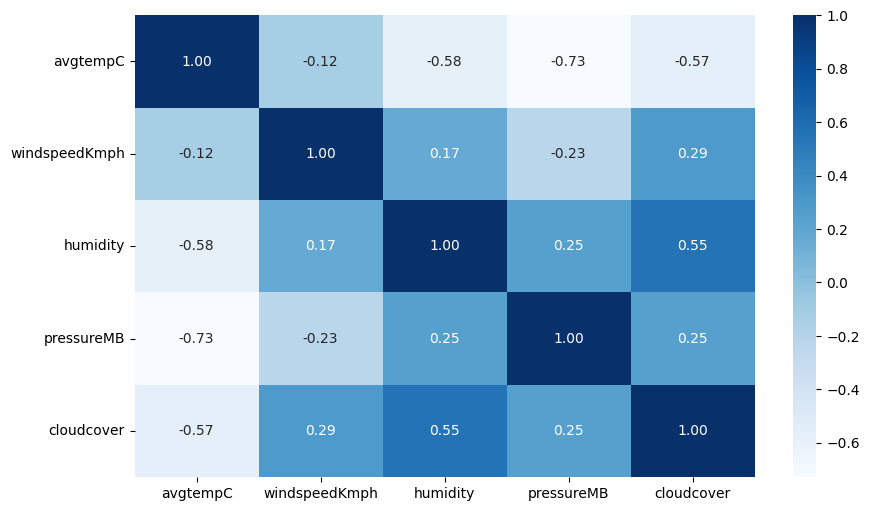

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), fmt=".2f", annot=True, cmap='Blues')
plt.show()

In [ ]:
list1=['avgtempC','windspeedKmph','humidity','pressureMB','cloudcover']
titles=['Mean Temperature Over Time','Wind Speed Over Time','Humidity Over Time','Pressure Over Time','Cloud Cover Over Time']


for i in range(len(list1)):
    fig = px.line(data, x=data.index, y=list1[i], title=titles[i])


  # Display the figure
    fig.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.subplots as sp
import plotly.graph_objects as go
# Perform seasonal decomposition
result = seasonal_decompose(data['avgtempC'], model='additive', period=365)

# Plot the decomposed components
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True,
                       subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual'])

fig.add_trace(go.Scatter(x=data.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

fig.update_layout(height=1000, width=800, title_text="Seasonal Decomposition")
fig.show()


# preparing the data

In [ ]:
data.index = pd.to_datetime(data.index)
timestamp_s = data.index.map(pd.Timestamp.timestamp)

In [ ]:
day_of_year = data.index.dayofyear
data['Year sin'] = np.sin(2 * np.pi * day_of_year / 365.2425)
data['Year cos'] = np.cos(2 * np.pi * day_of_year / 365.2425)

Text(0.5, 1.0, 'Time of year signal')

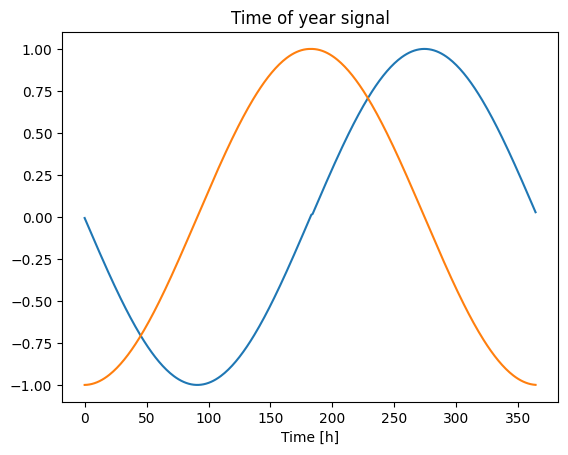

In [ ]:
plt.plot(np.array(data['Year sin'])[:365])
plt.plot(np.array(data['Year cos'])[:365])
plt.xlabel('Time [h]')
plt.title('Time of year signal')

In [ ]:
train=data.loc[:'2020-6-30']
test=data.loc['2020-6-30':]

In [ ]:
features=['windspeedKmph','humidity','pressureMB','cloudcover']
#targets=['maxtempC','mintempC','avgtempC']
targets=['avgtempC']

In [ ]:
features_scaler=MinMaxScaler()
target_scaler=MinMaxScaler()


In [ ]:

for feature in features:
    train[feature]=features_scaler.fit_transform(train[feature].values.reshape(-1,1))

for target in targets:
  train[target]=target_scaler.fit_transform(train[target].values.reshape(-1,1))


<ipython-input-25-a8724739ac08>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-a8724739ac08>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-a8724739ac08>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-a872473

In [ ]:
for feature in features:
    test[feature]=features_scaler.fit_transform(test[feature].values.reshape(-1,1))

for target in targets:
  test[target]=target_scaler.fit_transform(test[target].values.reshape(-1,1))


<ipython-input-26-e967dc3e6a11>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-e967dc3e6a11>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-e967dc3e6a11>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-e967dc3

In [ ]:
train.head()

,avgtempC,windspeedKmph,humidity,pressureMB,cloudcover,Year sin,Year cos
date,,,,,,,
2008-07-01,0.771429,0.212766,0.439560,0.200000,0.00,-0.006516,-0.999979
2008-07-02,0.771429,0.234043,0.428571,0.200000,0.01,-0.023716,-0.999719
2008-07-03,0.742857,0.212766,0.472527,0.200000,0.01,-0.040910,-0.999163
2008-07-04,0.742857,0.234043,0.505495,0.200000,0.06,-0.058091,-0.998311
2008-07-05,0.771429,0.234043,0.417582,0.233333,0.01,-0.075255,-0.997164


In [ ]:
test.head()

,avgtempC,windspeedKmph,humidity,pressureMB,cloudcover,Year sin,Year cos
date,,,,,,,
2020-06-30,0.666667,0.367347,0.414634,0.142857,0.01087,0.010687,-0.999943
2020-07-01,0.696970,0.265306,0.317073,0.142857,0.00000,-0.006516,-0.999979
2020-07-02,0.787879,0.122449,0.243902,0.107143,0.00000,-0.023716,-0.999719
2020-07-03,0.848485,0.142857,0.207317,0.107143,0.00000,-0.040910,-0.999163
2020-07-04,0.757576,0.367347,0.353659,0.142857,0.00000,-0.058091,-0.998311


In [ ]:
def windowed_dataset(series, window_size, batch_size, ):
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1,0]))
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [ ]:
window_size=4
batch_size=32
#shuffle_buffer=5000

In [ ]:
train_windowed=windowed_dataset(train,window_size=window_size,batch_size=batch_size)
test_windowed=windowed_dataset(test,window_size=window_size,batch_size=batch_size)

In [ ]:
for windows in train_windowed.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 4, 7)
shape of second element: (32,)


# helper functions

In [ ]:
def model_predict(model,data):
  prediction=model.predict(data)
  inverse_prediction=target_scaler.inverse_transform(prediction)
  return inverse_prediction

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metricss(y_true,y_pred):
  mse=mean_squared_error(y_true,y_pred)
  r2=r2_score(y_true,y_pred)
  mae=mean_absolute_error(y_true,y_pred)
  print(f'MSE: {mse}')
  print(f'R2: {r2}')
  print(f'MAE: {mae}')
  return mse,r2,mae

In [ ]:
def plot_sereis(time,actual_series,predicted_series):
  plt.figure(figsize=(14, 7))
  plt.plot(time,actual_series,label='actual')
  plt.plot(time,predicted_series,color='red',label='prediction')
  plt.legend()
  plt.show()

In [ ]:
def train_val_plot(history):
  training_loss = history.history['loss']
  # Plot loss values over epochs
  plt.plot(training_loss, label='Training Loss')

  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')

  plt.legend()
  plt.show()

# model implentation

SARIMA

In [ ]:
og_data['date'] = pd.to_datetime(og_data['date'])
filtered_data = og_data[og_data['loc_id'] == 1]
train_cpy=filtered_data[filtered_data['date'] < '2020-06-30']
test_cpy=filtered_data[filtered_data['date'] >= '2020-06-30']

In [ ]:
train_cpy.head()

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,...,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,1,2008-07-01,34,94,24,74,28,83,0.0,0.0,...,15.0,28.0,83.0,7.0,05:34 AM,07:47 PM,03:17 AM,06:24 PM,Waning Gibbous,89.7
1,1,2008-07-02,34,94,23,73,28,82,0.0,0.0,...,18.0,28.0,83.0,7.0,05:35 AM,07:47 PM,04:21 AM,07:29 PM,Waning Gibbous,82.8
2,1,2008-07-03,34,92,23,73,27,81,0.0,0.0,...,15.0,28.0,82.0,7.0,05:35 AM,07:46 PM,05:32 AM,08:24 PM,Waning Gibbous,75.9
3,1,2008-07-04,34,93,21,69,27,81,0.0,0.0,...,16.0,27.0,81.0,7.0,05:36 AM,07:46 PM,06:45 AM,09:10 PM,Last Quarter,69.0
4,1,2008-07-05,34,93,23,73,28,82,0.0,0.0,...,16.0,28.0,82.0,7.0,05:36 AM,07:46 PM,07:57 AM,09:48 PM,Last Quarter,62.1


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
order = (1, 1, 6)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, S)

# Fit the SARIMA model
sarima_model = SARIMAX(
    endog=train_cpy['avgtempC'],
    exog=train_cpy[['humidity', 'windspeedKmph']],
    order=order,
    seasonal_order=seasonal_order
)
sarima_model_fit = sarima_model.fit()


forecast_period = len(test_cpy)

exog_test = test_cpy[['humidity', 'windspeedKmph']]

sarima_pred = sarima_model_fit.predict(
    start=len(train_cpy),
    end=len(train_cpy) + forecast_period - 1,
    exog=exog_test
)


In [ ]:
sar_MSE,sar_R2,sar_MAE=metricss(test_cpy["avgtempC"],sarima_pred)

MSE: 77.61327582747268
R2: -0.3424036219843154
MAE: 7.29317484179807


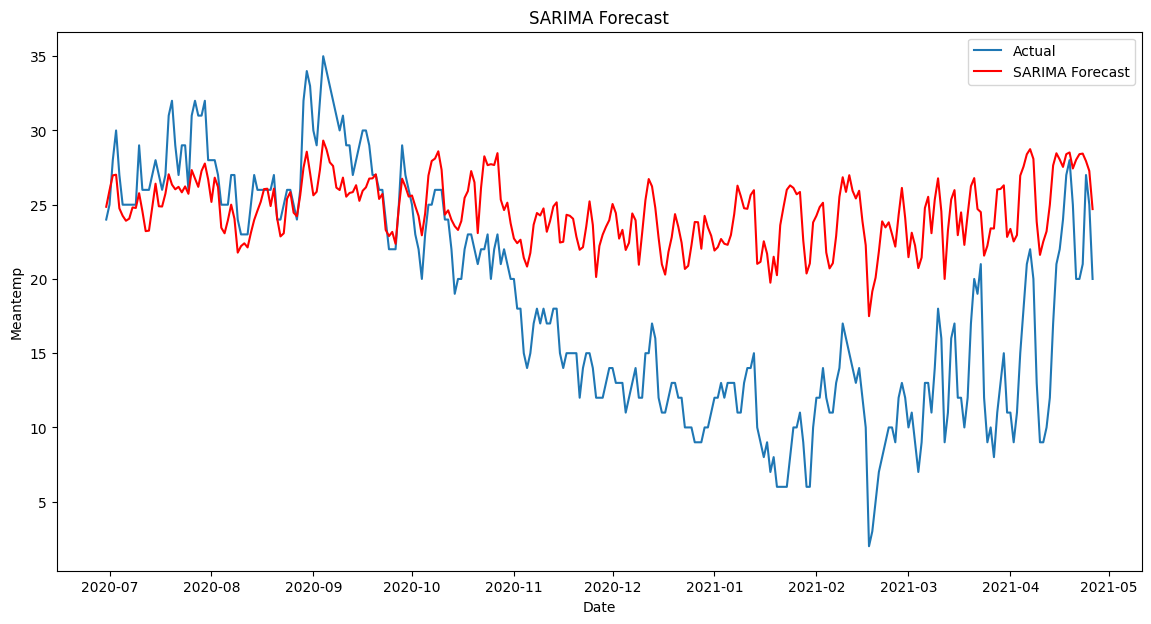

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(test_cpy["date"], test_cpy['avgtempC'], label='Actual')
plt.plot(test_cpy["date"], sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

 Prophet Model

In [ ]:
import pandas as pd
from prophet import Prophet

# Convert 'date' to datetime format if not already done
train_cpy['date'] = pd.to_datetime(train_cpy['date'])

# Create Prophet's required DataFrame structure
prophet_data = train_cpy[['date', 'avgtempC']].rename(columns={'date': 'ds', 'avgtempC': 'y'})



# Initialize and fit the Prophet model
prop_model = Prophet()
prop_model.fit(prophet_data)


<ipython-input-42-3c8985196215>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwbzo3t_/s4v6w5fm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwbzo3t_/75o5m3j8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31754', 'data', 'file=/tmp/tmpbwbzo3t_/s4v6w5fm.json', 'init=/tmp/tmpbwbzo3t_/75o5m3j8.json', 'output', 'file=/tmp/tmpbwbzo3t_/prophet_modeltohelsu6/prophet_model-20240619130917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:17 - cm

In [ ]:
future_dates = prop_model.make_future_dataframe(periods=len(test_cpy))

forecast = prop_model.predict(future_dates)


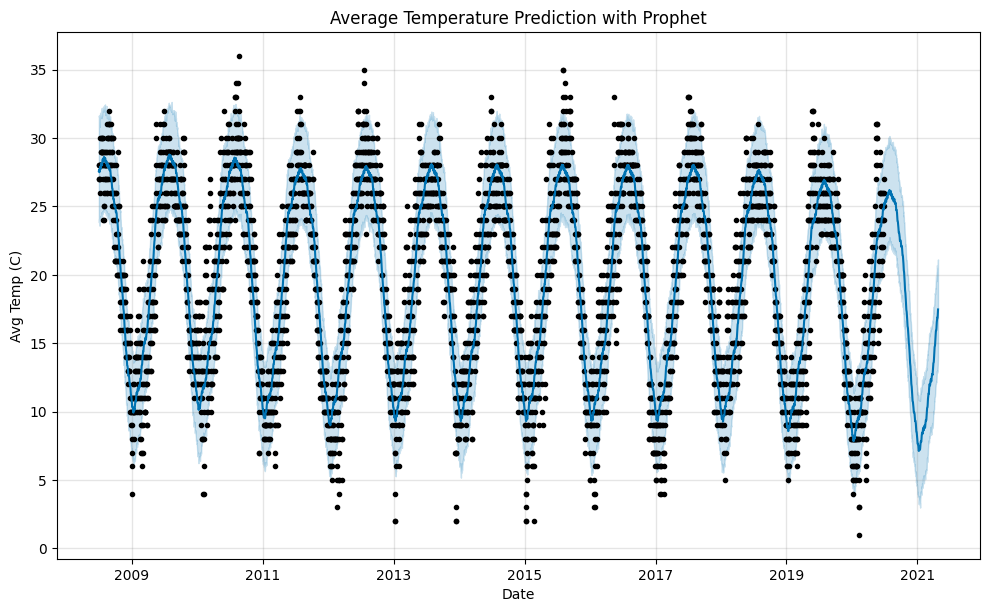

In [ ]:
# Plot the predictions
prop_model.plot(forecast, xlabel='Date', ylabel='Avg Temp (C)')
plt.title('Average Temperature Prediction with Prophet')
plt.show()

In [ ]:
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[test_cpy['date']]

In [ ]:
proph_MSE,proph_R2,proph_MAE=metricss(test_cpy["avgtempC"],predicted)

MSE: 14.004255179572187
R2: 0.7577816079037869
MAE: 2.9395461675691985


simple RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
model=Sequential()
model.add(SimpleRNN(32,activation='tanh',input_shape=(window_size,train.shape[1]),return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1))

In [ ]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
simple_RNN_history=model.fit(train_windowed,epochs=50)

Epoch 1/50
137/137 [==============================] - 12s 24ms/step - loss: 0.0625 - mae: 0.1699
Epoch 2/50
137/137 [==============================] - 3s 23ms/step - loss: 0.0236 - mae: 0.1235
Epoch 3/50
137/137 [==============================] - 4s 26ms/step - loss: 0.0124 - mae: 0.0905
Epoch 4/50
137/137 [==============================] - 3s 23ms/step - loss: 0.0149 - mae: 0.0981
Epoch 5/50
137/137 [==============================] - 3s 19ms/step - loss: 0.0101 - mae: 0.0812
Epoch 6/50
137/137 [==============================] - 2s 11ms/step - loss: 0.0103 - mae: 0.0813
Epoch 7/50
137/137 [==============================] - 3s 23ms/step - loss: 0.0091 - mae: 0.0765
Epoch 8/50
137/137 [==============================] - 2s 18ms/step - loss: 0.0084 - mae: 0.0732
Epoch 9/50
137/137 [==============================] - 3s 22ms/step - loss: 0.0079 - mae: 0.0711
Epoch 10/50
137/137 [==============================] - 4s 29ms/step - loss: 0.0075 - mae: 0.0694
Epoch 11/50
137/137 [=================

In [ ]:
y_original=target_scaler.inverse_transform(test)
prediction=model_predict(model,test_windowed)

10/10 [==============================] - 1s 14ms/step


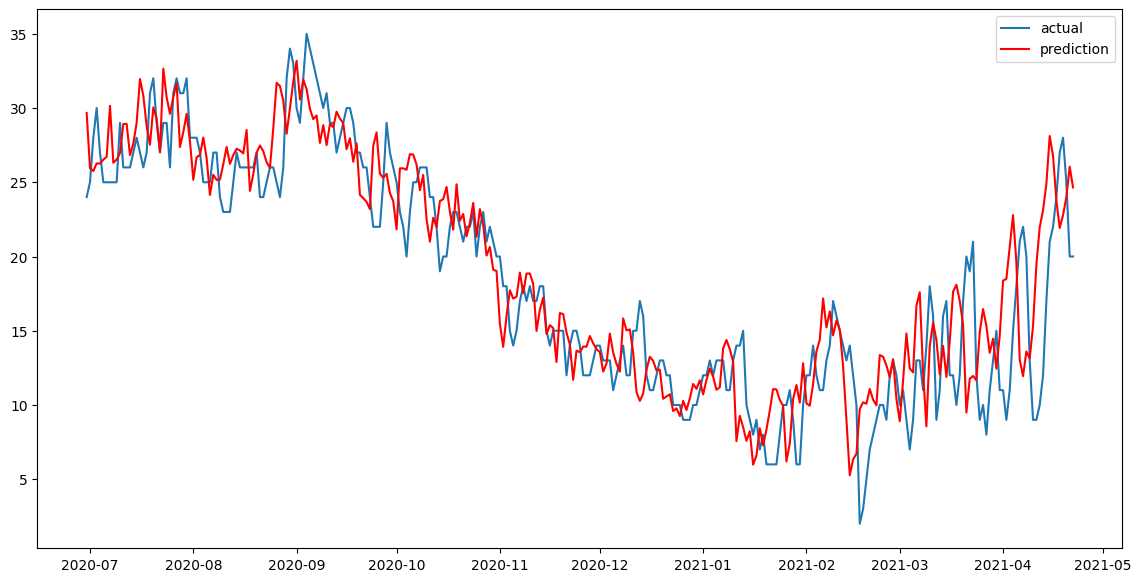

In [ ]:
plot_sereis(test.index[:-window_size],y_original[0:-window_size,0],prediction[:,0])

In [ ]:
RNN_MSE,RNN_R2,RNN_MAE=metricss(y_original[0:-window_size,0],prediction[:,0])

MSE: 13.031543870657554
R2: 0.7760211252830996
MAE: 2.7558430437287096


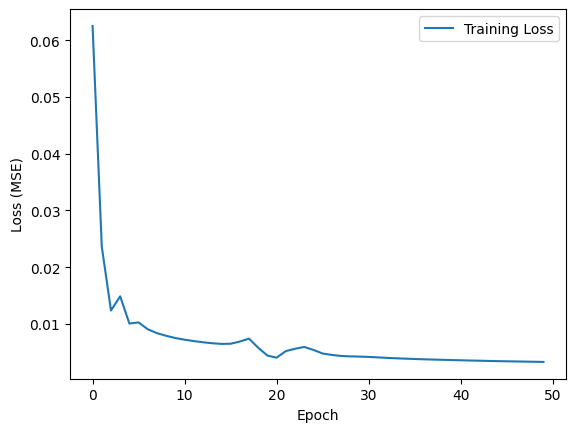

In [ ]:
train_val_plot(simple_RNN_history)

LSTM

In [ ]:
from tensorflow.keras.layers import LSTM
lstm_model=Sequential()
lstm_model.add(LSTM(100, activation='tanh', input_shape=(window_size,train.shape[1]), return_sequences=True))
lstm_model.add(LSTM(100, activation='tanh'))
lstm_model.add(Dense(1))


In [ ]:
lstm_model.compile(optimizer='adam', loss='mse')
lstm_history=lstm_model.fit(train_windowed,epochs=50,verbose=1)

Epoch 1/50
137/137 [==============================] - 8s 11ms/step - loss: 0.0297
Epoch 2/50
137/137 [==============================] - 2s 14ms/step - loss: 0.0098
Epoch 3/50
137/137 [==============================] - 2s 14ms/step - loss: 0.0090
Epoch 4/50
137/137 [==============================] - 1s 9ms/step - loss: 0.0085
Epoch 5/50
137/137 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 6/50
137/137 [==============================] - 1s 10ms/step - loss: 0.0070
Epoch 7/50
137/137 [==============================] - 1s 7ms/step - loss: 0.0065
Epoch 8/50
137/137 [==============================] - 2s 12ms/step - loss: 0.0060
Epoch 9/50
137/137 [==============================] - 1s 7ms/step - loss: 0.0055
Epoch 10/50
137/137 [==============================] - 1s 10ms/step - loss: 0.0049
Epoch 11/50
137/137 [==============================] - 2s 11ms/step - loss: 0.0044
Epoch 12/50
137/137 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 13/50
137/13

In [ ]:
prediction=model_predict(lstm_model,test_windowed)


10/10 [==============================] - 1s 5ms/step


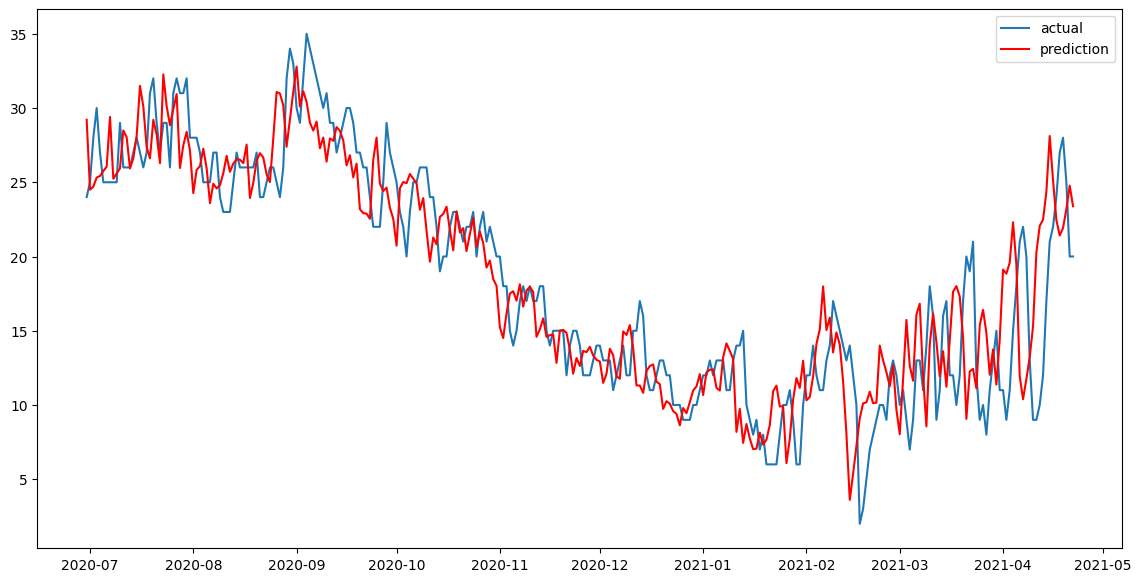

In [ ]:
plot_sereis(test.index[:-window_size],y_original[0:-window_size,0],prediction[:,0])

In [ ]:
LSTM_MSE,LSTM_R2,LSTM_MAE=metricss(y_original[0:-window_size,0],prediction[:,0])

MSE: 13.542755739542573
R2: 0.767234702103218
MAE: 2.8147926178042737


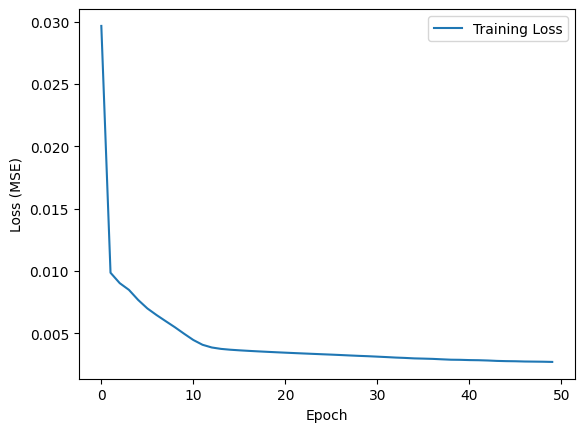

In [ ]:
train_val_plot(lstm_history)

In [ ]:
metrics_compare = {
        'SARIMA': [sar_MSE,sar_R2,sar_MAE],
        'PROPHET': [proph_MSE,proph_R2,proph_MAE],
        'simple RNN': [RNN_MSE,RNN_R2,RNN_MAE],
        'LSTM': [LSTM_MSE,LSTM_R2,LSTM_MAE]
             }

metrics_compare = pd.DataFrame(metrics_compare,index=['MSE','RMSE','MAE'])

In [ ]:
metrics_compare

,SARIMA,PROPHET,simple RNN,LSTM
MSE,77.613276,14.004255,13.031544,13.542756
RMSE,-0.342404,0.757782,0.776021,0.767235
MAE,7.293175,2.939546,2.755843,2.814793
